Dimensiones del dataset (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      

C:\Users\Ju12l\AppData\Local\Temp\ipykernel_14712\3861877606.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='Set2')


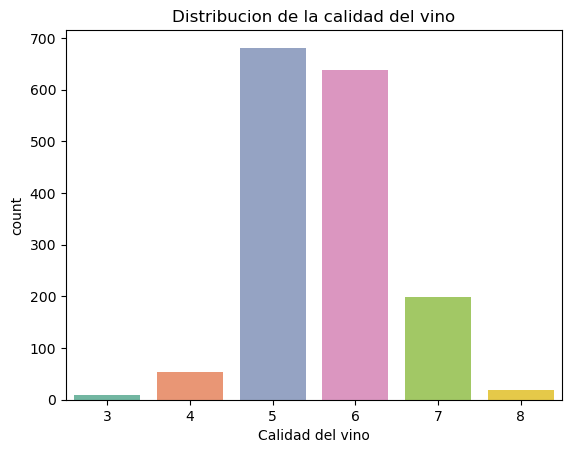

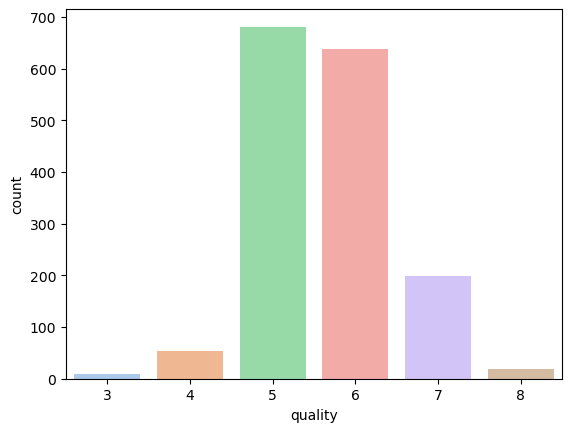

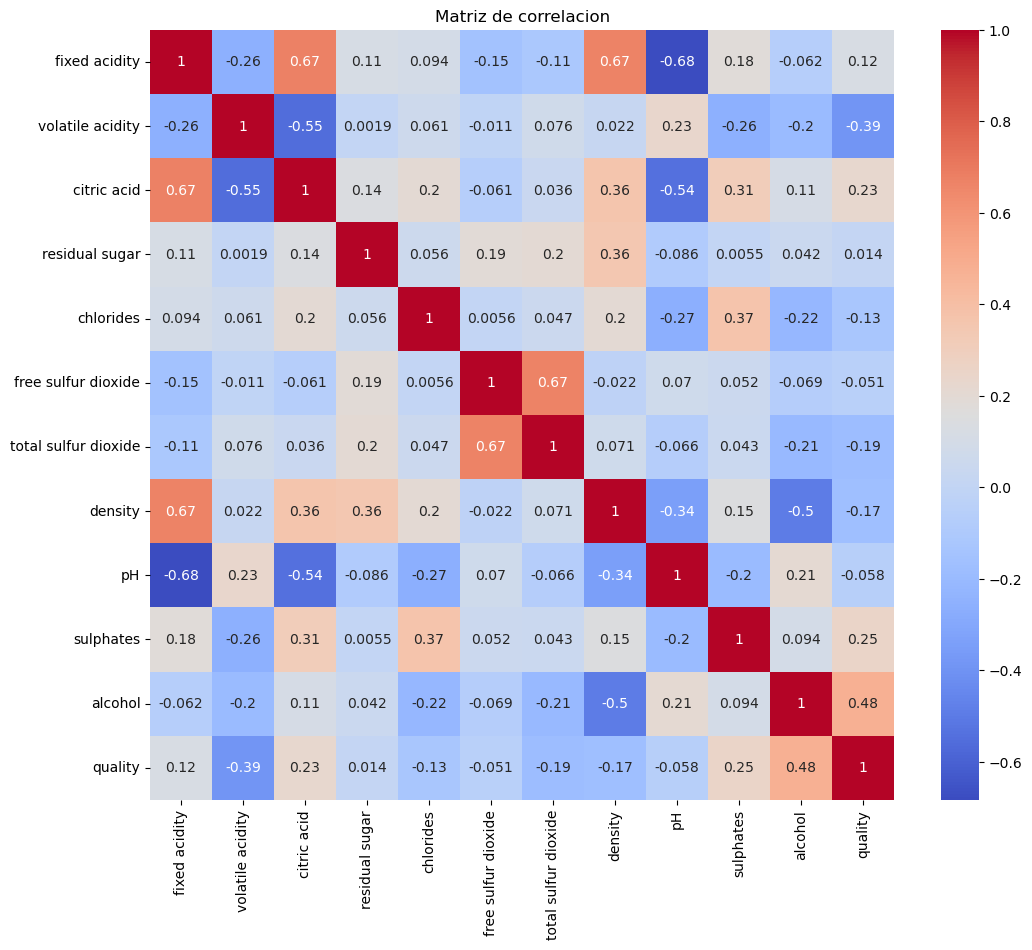

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv("winequality-red.csv")
df.columns= df.columns.str.strip()


print("Dimensiones del dataset",df.shape)
print(df.head())

print("\nInformation del dataset:")
print(df.info())

print("\nEstadisticas descriptivas;")
print(df.describe())

print("\nValores nulos por culoumna:")
print(df.isnull().sum())


sns.countplot(x='quality', data=df, palette='Set2')
plt.title("Distribucion de la calidad del vino")
plt.xlabel("Calidad del vino")
plt.show()

sns.countplot(x='quality', hue='quality', data=df, palette='pastel', legend=False)

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title("Matriz de correlacion")
plt.show()


In [74]:
def categorizar_calidad(valor):
    if valor<=4:
        return'bajo'
    elif valor<=6:
        return'medio'
    else:
        return'alto'

df['quality_label']= df['quality'].apply(categorizar_calidad)

In [76]:
from sklearn.feature_selection import SelectKBest,f_classif

x=df.drop(['quality_label'], axis=1)
y=df['quality_label']

selector=SelectKBest(score_func=f_classif, k=8)
x_new=selector.fit_transform(x,y)

selected_features=x.columns[selector.get_support()]
print("Caracteristicas seleccionadas:",selected_features)


Caracteristicas seleccionadas: Index(['fixed acidity', 'volatile acidity', 'citric acid',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x=df[selected_features]
y=df['quality_label']

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

x_train, x_test, y_train, y_test =train_test_split(
    x_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [80]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [82]:
from sklearn.tree import DecisionTreeClassifier

tree_model=DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [84]:
from sklearn.linear_model import LinearRegression

y_reg= df['quality']
x_train_reg, x_test_reg, y_train_reg, y_test_reg= train_test_split(x_scaled, y_reg, test_size=0.2, random_state=42)

linreg_model=LinearRegression()
linreg_model.fit(x_train_reg, y_train_reg)

LinearRegression()


Modelo:Logistica
              precision    recall  f1-score   support

        alto       1.00      1.00      1.00        43
        bajo       1.00      1.00      1.00        13
       medio       1.00      1.00      1.00       264

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



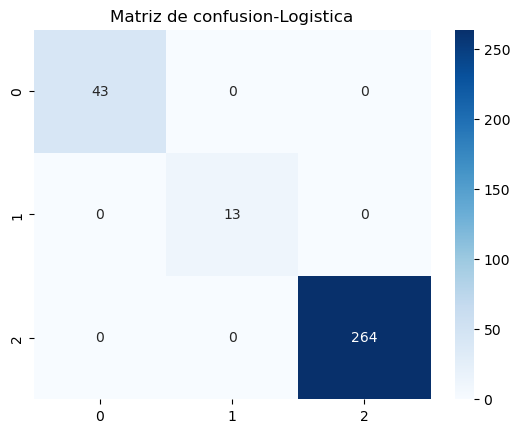


Modelo:Arbol
              precision    recall  f1-score   support

        alto       1.00      1.00      1.00        43
        bajo       1.00      1.00      1.00        13
       medio       1.00      1.00      1.00       264

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



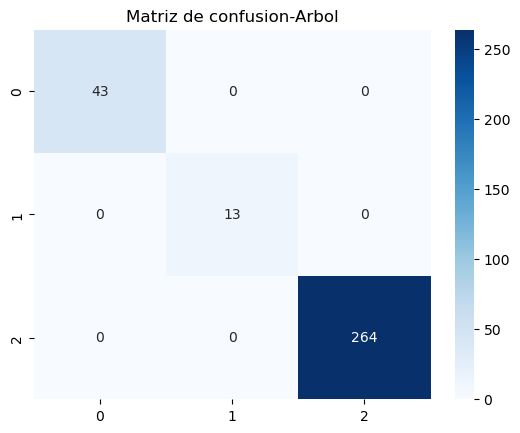

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

for model, name in zip([log_model, tree_model], ["Logistica", "Arbol"]):
    print(f"\nModelo:{name}")
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de confusion-{name}")
    plt.show()

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_reg=linreg_model.predict(x_test_reg)
print("Regresion Lineal:")
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("R²:", r2_score(y_test_reg, y_pred_reg))

Regresion Lineal:
MSE: 1.2430722233052974e-30
R²: 1.0


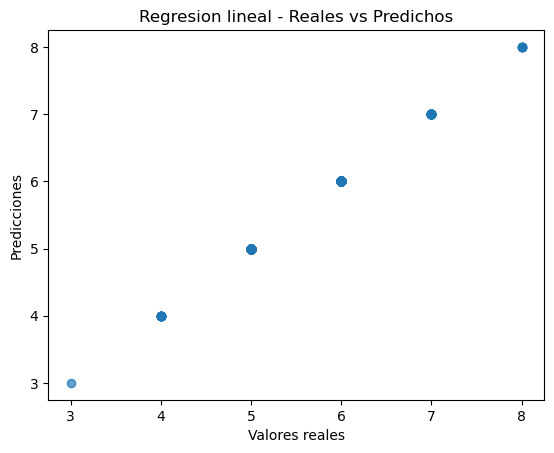

In [94]:
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresion lineal - Reales vs Predichos")
plt.show()